## Train x-modalix example

In [1]:
%env CUBLAS_WORKSPACE_CONFIG=:16:8

env: CUBLAS_WORKSPACE_CONFIG=:16:8


In [2]:
import os
from autoencodix.utils.default_config import DataConfig, DataInfo, DefaultConfig
import autoencodix as acx


IMGROOT = os.path.join("../data/images/ALY-2_SYS721/")
IMGMAPPING = os.path.join("../data/ALY-2_SYS721_mappings.txt")
NUMFILE = os.path.join("../data/AM3_NO2_raw_cell.tsv")

img_config = DefaultConfig(
    checkpoint_interval=1,
	loss_reduction = "sum",
    class_param="early",
    epochs=250,
    pretrain_epochs=0,
	beta = 0.01,
	gamma= 3,
	delta_class= 0,
	delta_pair = 3,
	learning_rate=0.005,
	k_filter=1000,
	latent_dim=8,
    batch_size=32,
	anneal_pretraining=True,
    data_config=DataConfig(
        data_info={
            "IMG": DataInfo(
                file_path=IMGROOT,
                data_type="IMG",
				scaling="MINMAX",
                translate_direction="to",
                pretrain_epochs=75,
            ),
            "RNA": DataInfo(
                file_path=NUMFILE,
                data_type="NUMERIC",
				scaling = "MINMAX",
                translate_direction="from",
            ),
            # "RNA2": DataInfo(
            #     file_path=NUMFILE,
			# 	scaling = "MINMAX",
            #     data_type="NUMERIC",
            # ),
            "ANNO": DataInfo(
                file_path=IMGMAPPING,
                data_type="ANNOTATION",
            ),
        },
    ),
)

xmodalix = acx.XModalix(config=img_config)
xmodalix.run()

/home/ewald/Github/autoencodix_package/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/ewald/Github/autoencodix_package/.venv/lib/python3.10/site-packages/torch/cuda/__init__.py:619: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


preprocessing
Checking data type: IMG
Found image type in config
current data info: file_path='../data/images/ALY-2_SYS721/' data_type='IMG' scaling='MINMAX' filtering='VAR' sep=None extra_anno_file=None is_single_cell=False min_cells=0.05 min_genes=0.02 selected_layers=['X'] is_X=False normalize_counts=True log_transform=True k_filter=20 img_root=None img_width_resize=64 img_height_resize=64 translate_direction='to' pretrain_epochs=75
Checking data type: RNA
Checking data type: ANNO
Given image size is possible, rescaling images to: 64x64
reading annotation file: ../data/ALY-2_SYS721_mappings.txt
Successfully loaded 260 images for IMG
 n_samples: {'multi_sc': {'multi_sc': 0}, 'multi_bulk': {'RNA': 260}, 'annotation': {'paired': 260, 'IMG': 260}, 'img': {'IMG': 260}, 'from_modality': {}, 'to_modality': {}, 'paired_count': {'paired_count': 260}}
Converting 182 images to torch.float32 tensors...
Converting 52 images to torch.float32 tensors...
Converting 26 images to torch.float32 tensor

/home/ewald/Github/autoencodix_package/src/autoencodix/utils/_imgreader.py:251: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support sep=None with delim_whitespace=False; you can avoid this warning by specifying engine='python'.
  annotation = pd.read_csv(anno_file, sep=sep)
/home/ewald/Github/autoencodix_package/src/autoencodix/data/_filter.py:92: UserWarning: WARNING: k is None or greater than number of columns, keeping all features.
  warnings.warn(


Check if we need to pretrain: multi_bulk.RNA
pretrain epochs : 0
No pretraining for multi_bulk.RNA
Check if we need to pretrain: img.IMG
pretrain epochs : 75
Starting Pretraining for: img.IMG with <class 'autoencodix.trainers._general_trainer.GeneralTrainer'>
Epoch 1 - Train Loss: 42752.9001
Sub-losses: recon_loss: 42752.8955, var_loss: 11522.1575, anneal_factor: 0.0000, effective_beta_factor: 0.0000
Epoch 1 - Valid Loss: 12890.8428
Sub-losses: recon_loss: 12890.8418, var_loss: 1329.9847, anneal_factor: 0.0000, effective_beta_factor: 0.0000
Epoch 2 - Train Loss: 7972.4732
Sub-losses: recon_loss: 7972.4584, var_loss: 30301.3950, anneal_factor: 0.0000, effective_beta_factor: 0.0000
Epoch 2 - Valid Loss: 9459.6064
Sub-losses: recon_loss: 9459.6055, var_loss: 2414.1846, anneal_factor: 0.0000, effective_beta_factor: 0.0000
Epoch 3 - Train Loss: 4298.4896
Sub-losses: recon_loss: 4298.4663, var_loss: 43636.0093, anneal_factor: 0.0001, effective_beta_factor: 0.0000
Epoch 3 - Valid Loss: 2189.6

Result Object Public Attributes:
------------------------------
latentspaces: TrainingDynamics object
sample_ids: TrainingDynamics object
reconstructions: TrainingDynamics object
mus: TrainingDynamics object
sigmas: TrainingDynamics object
losses: TrainingDynamics object
sub_losses: LossRegistry(_losses={'total_loss': TrainingDynamics(), 'adver_loss': TrainingDynamics(), 'aggregated_sub_losses': TrainingDynamics(), 'paired_loss': TrainingDynamics(), 'class_loss': TrainingDynamics(), 'multi_bulk.RNA.recon_loss': TrainingDynamics(), 'multi_bulk.RNA.var_loss': TrainingDynamics(), 'multi_bulk.RNA.anneal_factor': TrainingDynamics(), 'multi_bulk.RNA.effective_beta_factor': TrainingDynamics(), 'multi_bulk.RNA.loss': TrainingDynamics(), 'img.IMG.recon_loss': TrainingDynamics(), 'img.IMG.var_loss': TrainingDynamics(), 'img.IMG.anneal_factor': TrainingDynamics(), 'img.IMG.effective_beta_factor': TrainingDynamics(), 'img.IMG.loss': TrainingDynamics(), 'clf_loss': TrainingDynamics()})
preprocessed

Creating plots ...


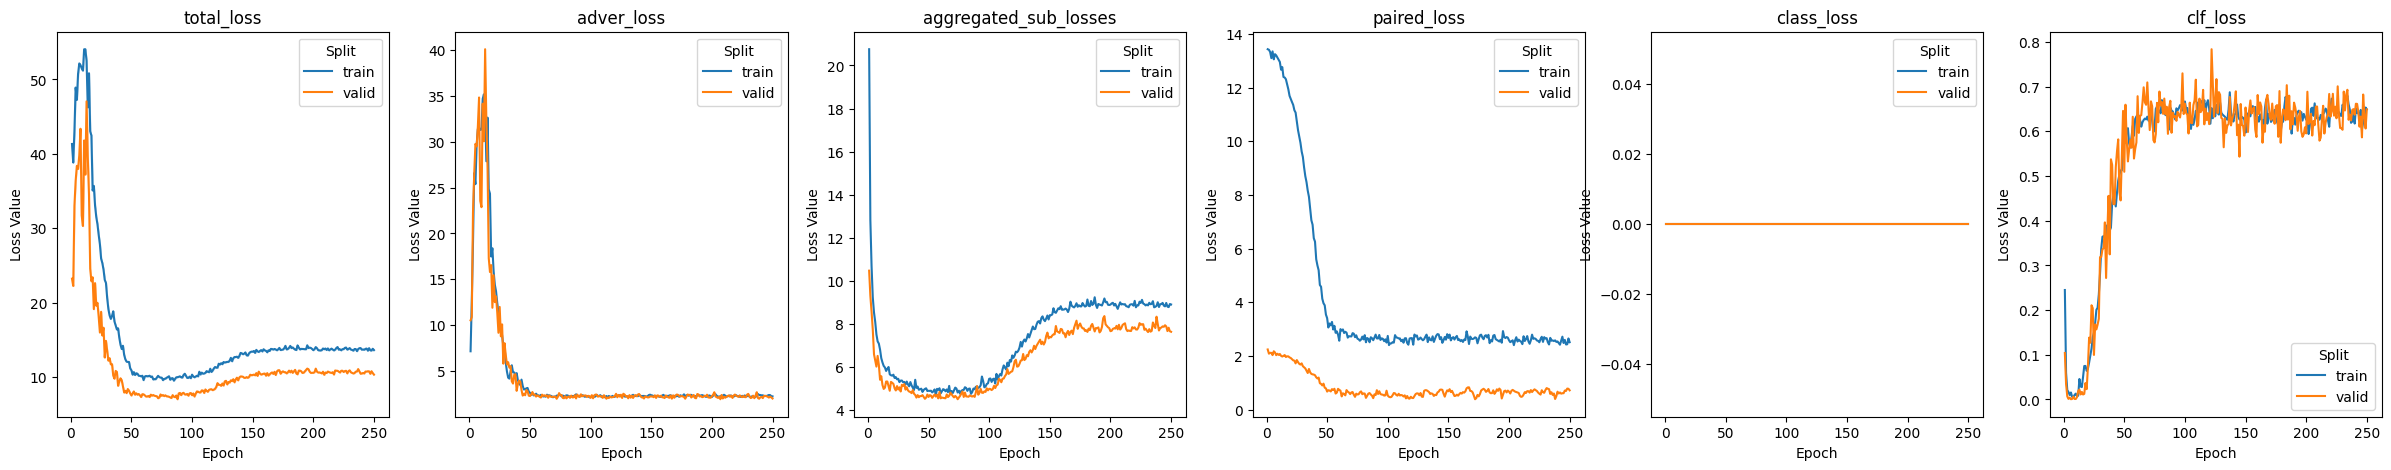

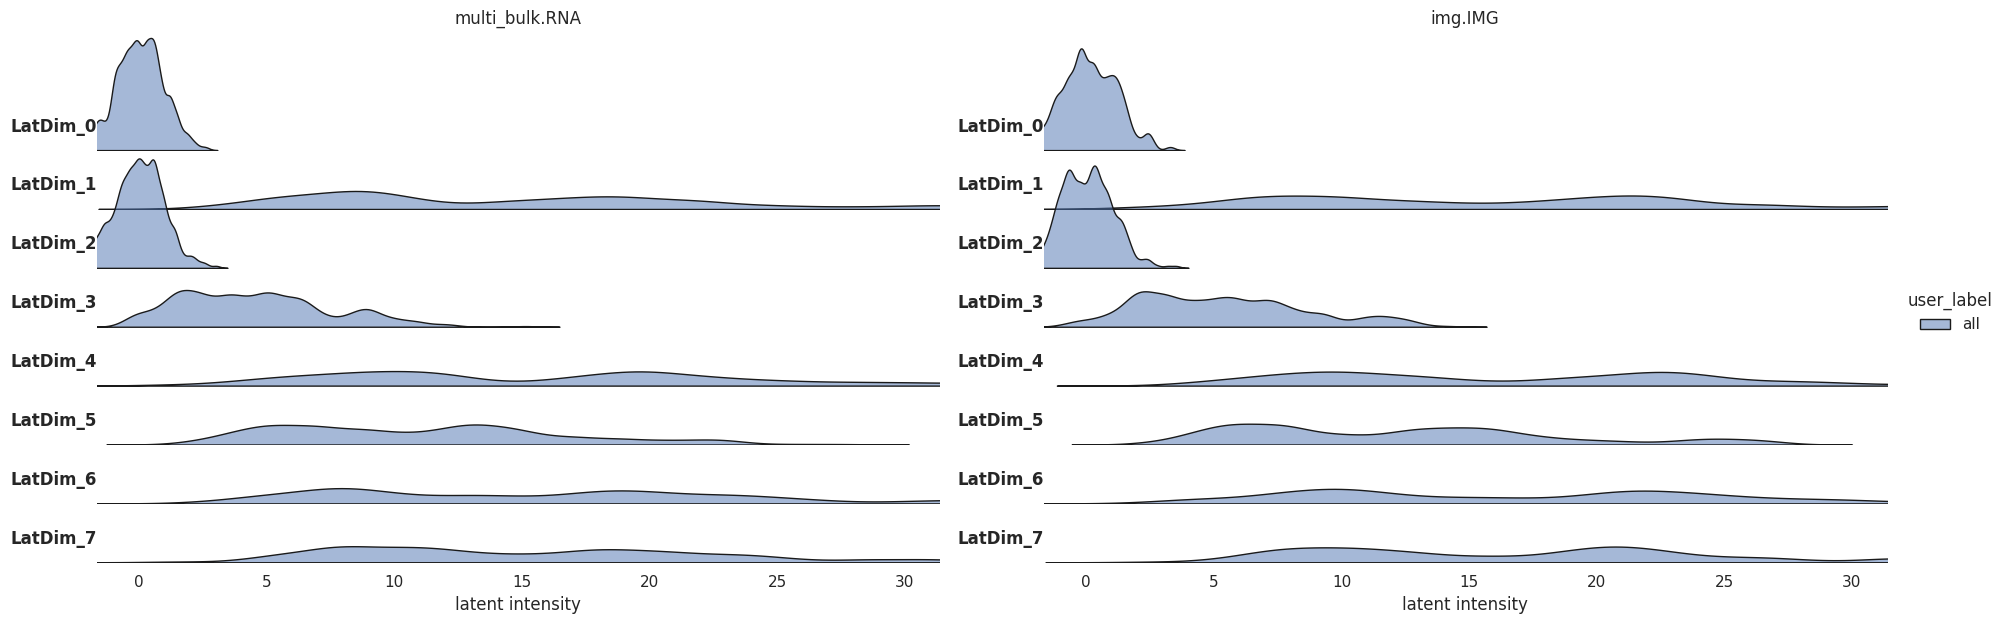

/home/ewald/Github/autoencodix_package/.venv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


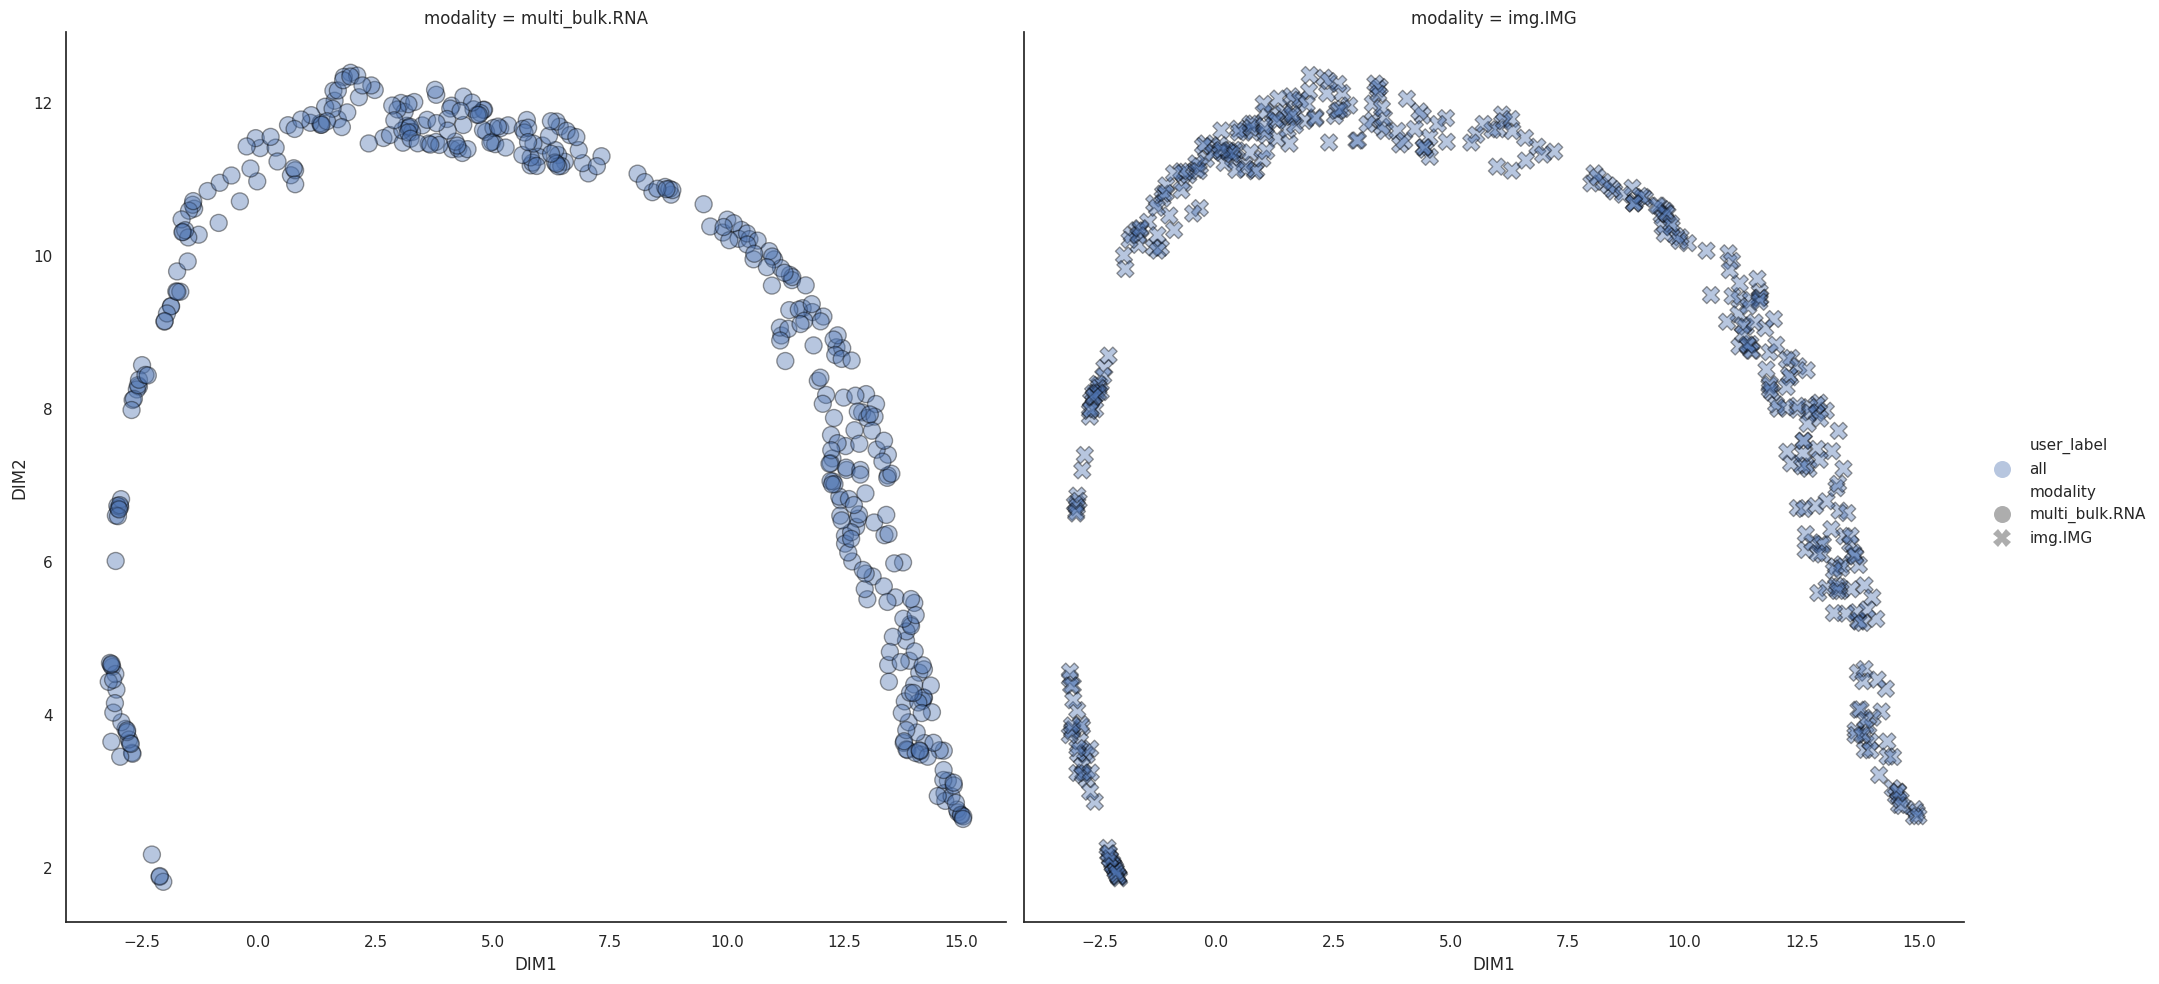

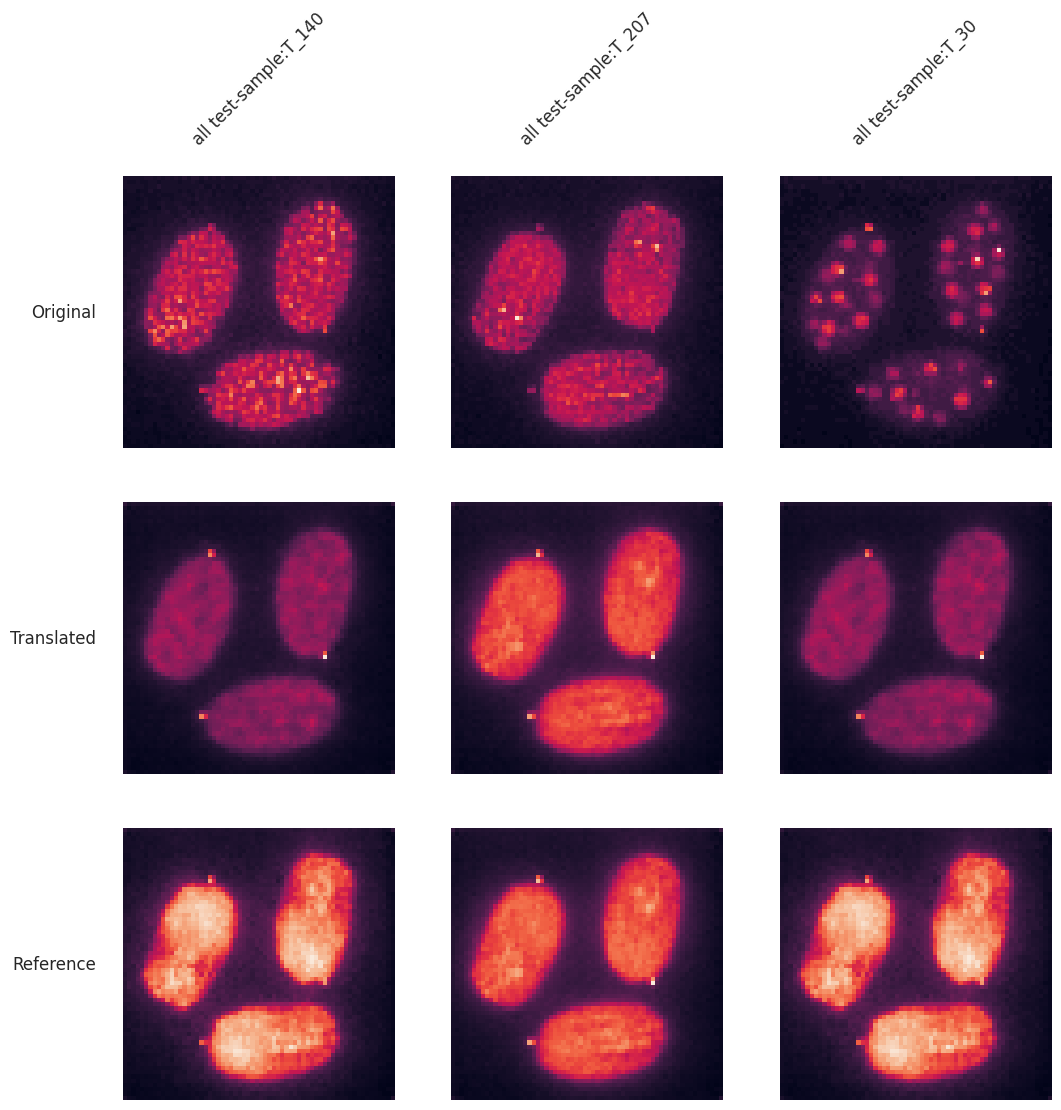

In [3]:
xmodalix.show_result()

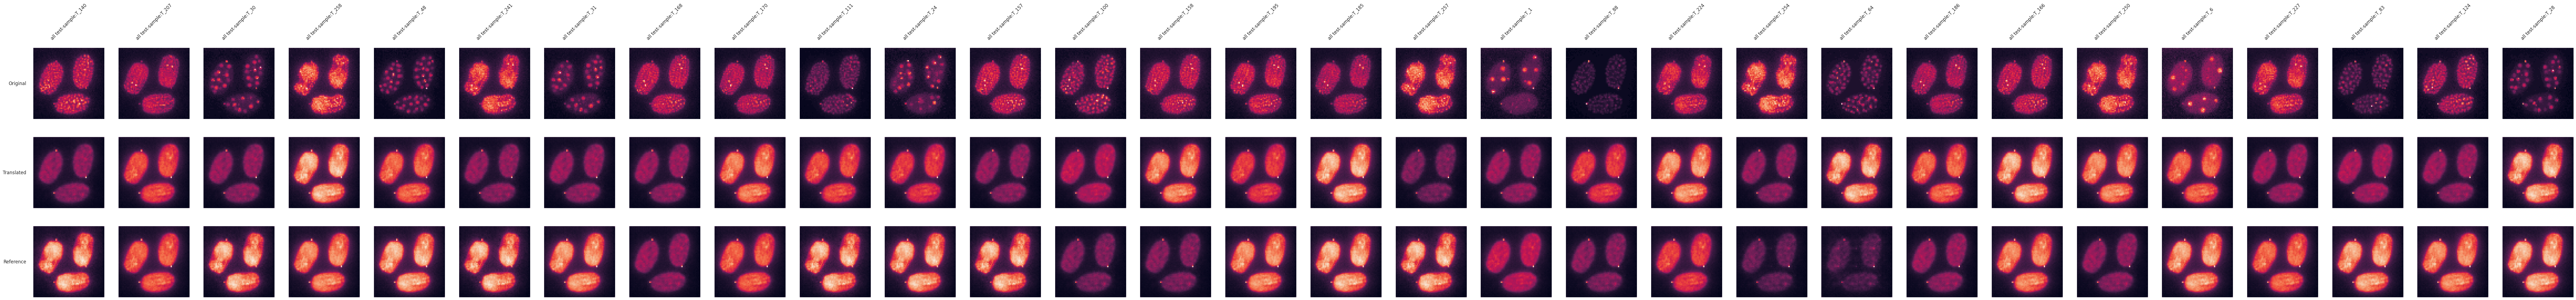

In [4]:
from autoencodix.utils._utils import find_translation_keys

dm_keys = find_translation_keys(config=xmodalix.config, trained_modalities=xmodalix._trainer._modality_dynamics.keys())

xmodalix._visualizer.show_image_translation(result=xmodalix.result, from_key=dm_keys["from"], to_key=dm_keys["to"], n_sample_per_class=30)

## ML embedding eval development

In [5]:
## Evaluate
from sklearn import linear_model
sklearn_ml_class = linear_model.LogisticRegression(
							solver="sag",
							n_jobs=-1,
							class_weight="balanced",
							max_iter=200,
) ## Support of all sklearn-like models
sklearn_ml_regression = linear_model.LinearRegression()
own_metric_class = 'roc_auc_ovr'  ## sklearn name of metrics: https://scikit-learn.org/stable/modules/model_evaluation.html#string-name-scorers
own_metric_regression = 'r2' 

xmodalix.evaluate(
	ml_model_class=sklearn_ml_class, # Default is sklearn LogisticRegression
	ml_model_regression=sklearn_ml_regression, # Default is sklearn LinearRegression
	params= ["early", "extra_class_labels"],	# No default? ... or all params in annotation?
	metric_class = own_metric_class, # Default is 'roc_auc_ovr'
	metric_regression = own_metric_regression, # Default is 'r2'
	reference_methods = ["PCA", "UMAP", "RandomFeature"], # Default [], no references? or all possible? or only PCA?
	split_type = "use-split", # Default is "use-split", other options: "CV-5", ... "LOOCV"?
)


Perform ML task with feature df: PCA_$_multi_bulk.RNA
Processing dataset: multi_bulk.RNA
Processing dataset: img.IMG
Processing dataset: multi_bulk.RNA
Processing dataset: img.IMG
Processing dataset: multi_bulk.RNA
Processing dataset: img.IMG
PCA_$_multi_bulk.RNA
Perform ML task with feature df: PCA_$_img.IMG
Processing dataset: multi_bulk.RNA
Processing dataset: img.IMG
Processing dataset: multi_bulk.RNA
Processing dataset: img.IMG
Processing dataset: multi_bulk.RNA
Processing dataset: img.IMG
PCA_$_img.IMG
Perform ML task with feature df: UMAP_$_multi_bulk.RNA
Processing dataset: multi_bulk.RNA
Processing dataset: img.IMG
Processing dataset: multi_bulk.RNA
Processing dataset: img.IMG
Processing dataset: multi_bulk.RNA
Processing dataset: img.IMG
UMAP_$_multi_bulk.RNA
Perform ML task with feature df: UMAP_$_img.IMG
Processing dataset: multi_bulk.RNA
Processing dataset: img.IMG


/home/ewald/Github/autoencodix_package/.venv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/ewald/Github/autoencodix_package/.venv/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Processing dataset: multi_bulk.RNA
Processing dataset: img.IMG
Processing dataset: multi_bulk.RNA
Processing dataset: img.IMG
UMAP_$_img.IMG


/home/ewald/Github/autoencodix_package/.venv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/ewald/Github/autoencodix_package/.venv/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Perform ML task with feature df: RandomFeature_$_multi_bulk.RNA
Processing dataset: multi_bulk.RNA
Processing dataset: img.IMG
Processing dataset: multi_bulk.RNA
Processing dataset: img.IMG
Processing dataset: multi_bulk.RNA
Processing dataset: img.IMG
RandomFeature_$_multi_bulk.RNA_R1
RandomFeature_$_multi_bulk.RNA_R2
RandomFeature_$_multi_bulk.RNA_R3
RandomFeature_$_multi_bulk.RNA_R4
RandomFeature_$_multi_bulk.RNA_R5
Perform ML task with feature df: RandomFeature_$_img.IMG
Processing dataset: multi_bulk.RNA
Processing dataset: img.IMG
Processing dataset: multi_bulk.RNA
Processing dataset: img.IMG
Processing dataset: multi_bulk.RNA
Processing dataset: img.IMG
RandomFeature_$_img.IMG_R1
RandomFeature_$_img.IMG_R2
RandomFeature_$_img.IMG_R3
RandomFeature_$_img.IMG_R4
RandomFeature_$_img.IMG_R5
Perform ML task with feature df: Latent_$_multi_bulk.RNA
Processing dataset: multi_bulk.RNA
Processing dataset: img.IMG
Processing dataset: multi_bulk.RNA
Processing dataset: img.IMG
Processing da

/home/ewald/Github/autoencodix_package/.venv/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/ewald/Github/autoencodix_package/.venv/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Result Object Public Attributes:
------------------------------
latentspaces: TrainingDynamics object
sample_ids: TrainingDynamics object
reconstructions: TrainingDynamics object
mus: TrainingDynamics object
sigmas: TrainingDynamics object
losses: TrainingDynamics object
sub_losses: LossRegistry(_losses={'total_loss': TrainingDynamics(), 'adver_loss': TrainingDynamics(), 'aggregated_sub_losses': TrainingDynamics(), 'paired_loss': TrainingDynamics(), 'class_loss': TrainingDynamics(), 'multi_bulk.RNA.recon_loss': TrainingDynamics(), 'multi_bulk.RNA.var_loss': TrainingDynamics(), 'multi_bulk.RNA.anneal_factor': TrainingDynamics(), 'multi_bulk.RNA.effective_beta_factor': TrainingDynamics(), 'multi_bulk.RNA.loss': TrainingDynamics(), 'img.IMG.recon_loss': TrainingDynamics(), 'img.IMG.var_loss': TrainingDynamics(), 'img.IMG.anneal_factor': TrainingDynamics(), 'img.IMG.effective_beta_factor': TrainingDynamics(), 'img.IMG.loss': TrainingDynamics(), 'clf_loss': TrainingDynamics()})
preprocessed

Showing plot for ML algorithm: LogisticRegression(class_weight='balanced', max_iter=200, n_jobs=-1,
                   solver='sag')


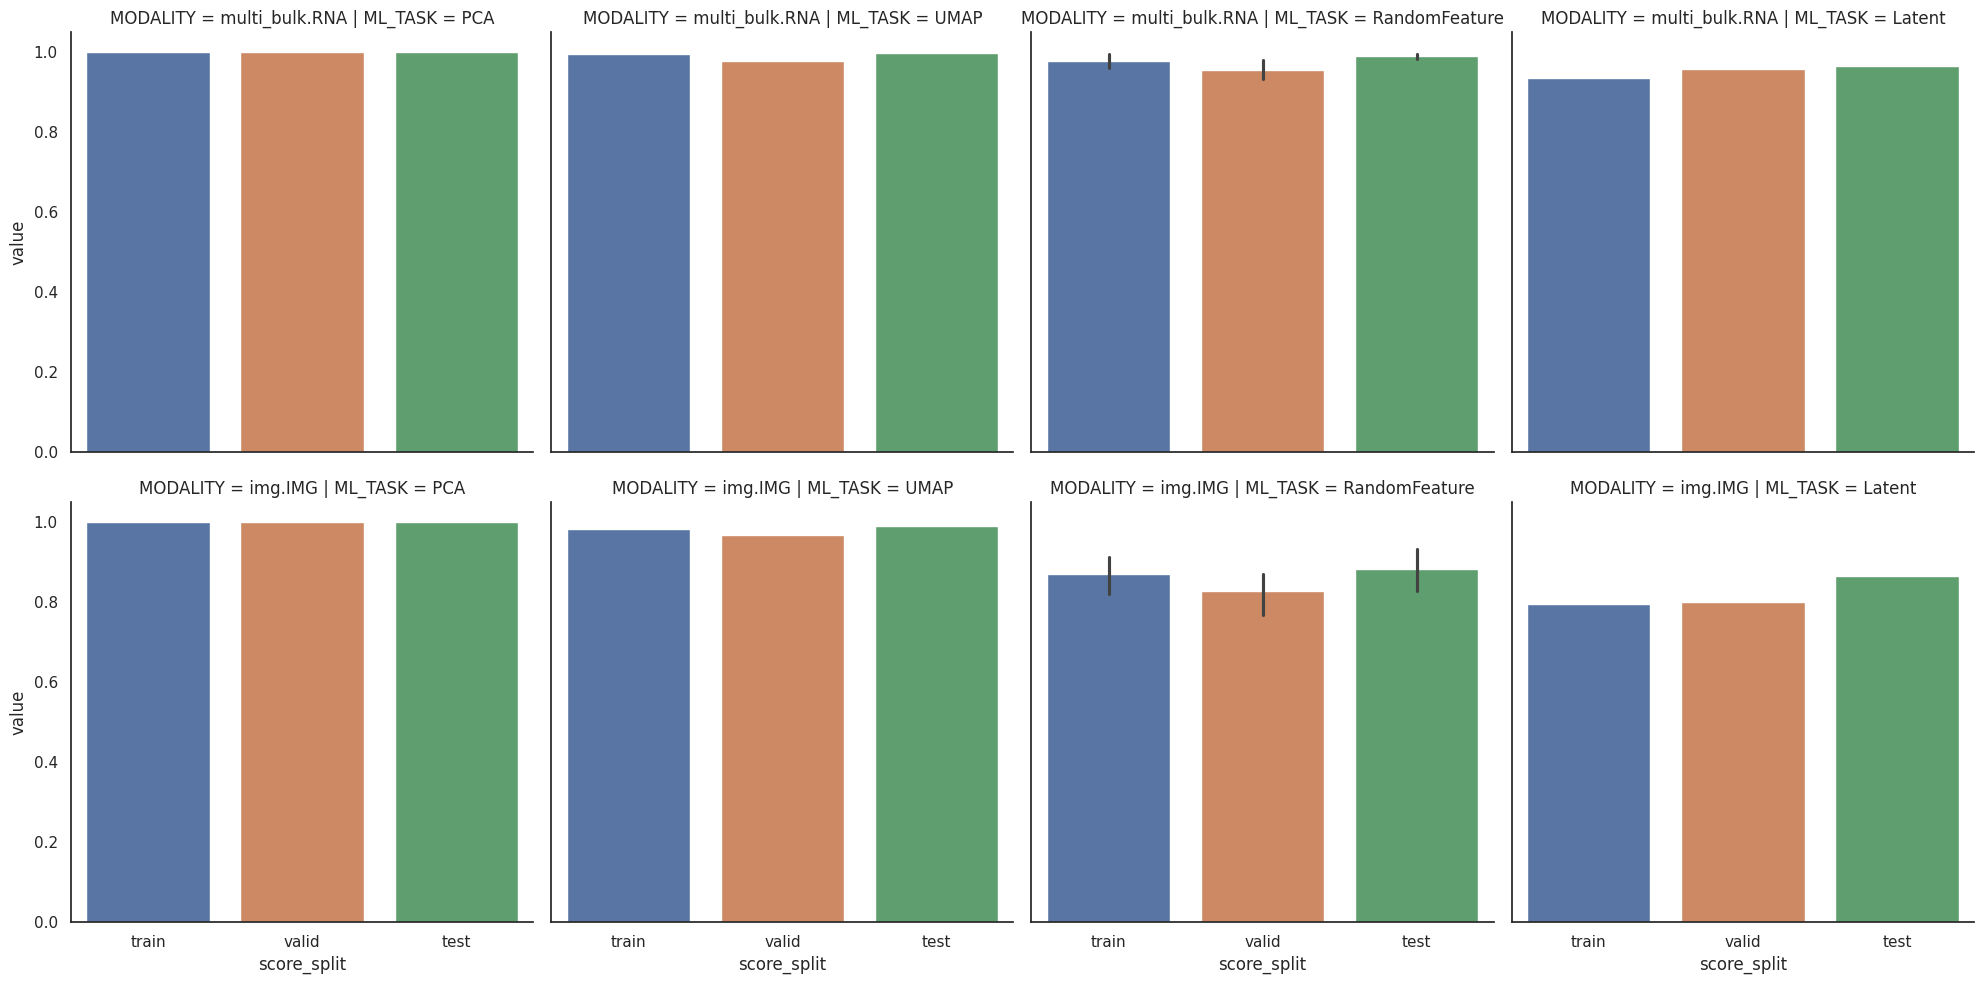

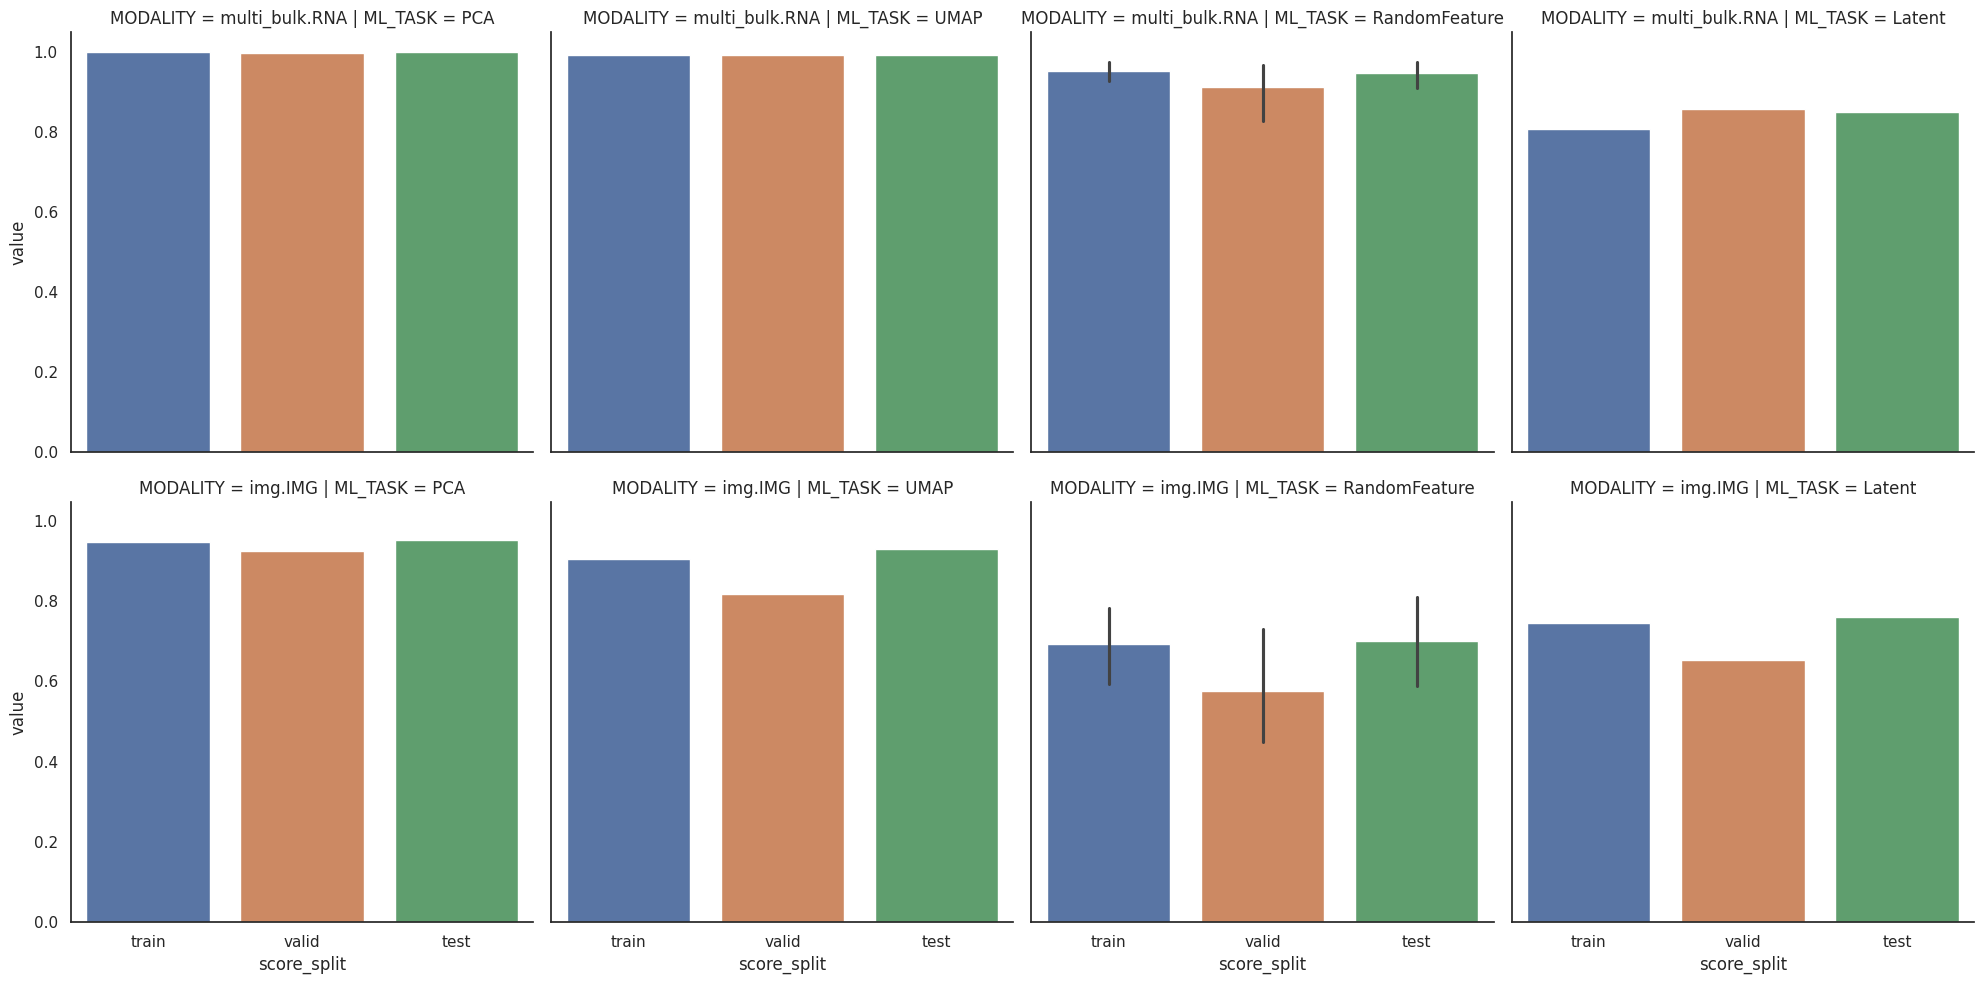

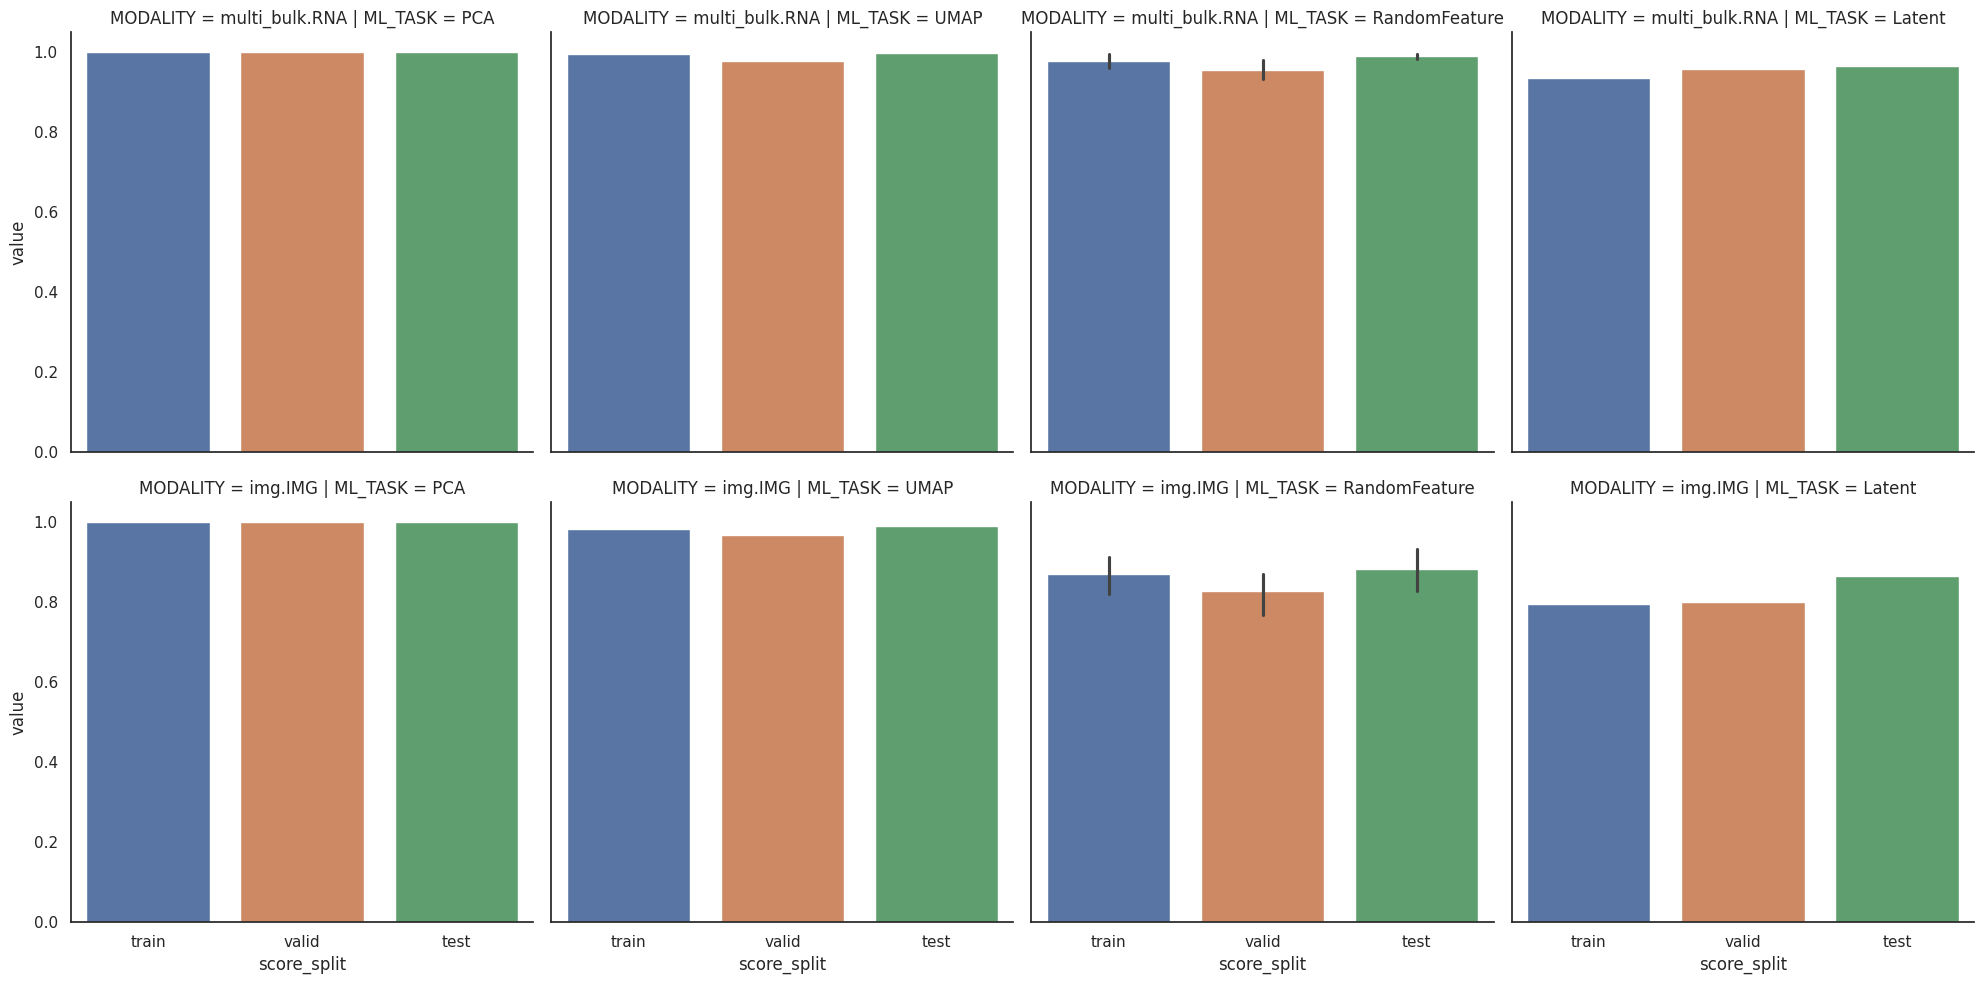

In [6]:
fig = xmodalix._visualizer.show_evaluation(
	param="early",
	metric="roc_auc_ovr"
)

## UMAP/PCA translation visualization

In [7]:
import pandas as pd

dataset = xmodalix.result.datasets

translated_modality = "img.IMG"

df_processed = pd.concat([
                    # dataset.train._to_df(modality=translated_modality),
                    dataset.test._to_df(modality=translated_modality),
                    # dataset.valid._to_df(modality=translated_modality),
                ])

df_processed.shape

(52, 4096)

In [8]:
# xmodalix.result.reconstructions.get(epoch=-1, split="train")["translation"] ## Translation only for test available
xmodalix.result.reconstructions.get(epoch=-1, split="test")["translation"].shape
## TODO unclear why it has different shape

(62, 1, 64, 64)

In [9]:
import torch 
# Get the list of tensors
tensor_list = xmodalix.result.reconstructions.get(epoch=-1, split="test")["translation"]

# Flatten each tensor and collect as rows
rows = [t.flatten().cpu().numpy() if isinstance(t, torch.Tensor) else t.flatten() for t in tensor_list]

# Create DataFrame
df_translate_flat = pd.DataFrame(rows, columns=["Pixel_" + str(i) for i in range(len(rows[0]))])

df_translate_flat.shape

(62, 4096)

In [10]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from umap import UMAP

task = "UMAP"

if task == "UMAP":
	reducer = UMAP(n_components=2)
elif task == "PCA":
	reducer = PCA(n_components=2)
elif task == "TSNE":
	reducer = TSNE(n_components=2)

df_red_comb = pd.DataFrame(reducer.fit_transform(
	pd.concat([df_processed, df_translate_flat], axis=0)
	))

df_red_comb.shape

df_red_comb["origin"]  = ["input"] * df_processed.shape[0] + ["translated"] * df_translate_flat.shape[0]

/home/ewald/Github/autoencodix_package/.venv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [11]:
param = "early"

In [12]:
labels = list(xmodalix.result.datasets.test.datasets["img.IMG"].metadata[param]) * 2 

In [13]:
df_red_comb[param] = labels + labels[0:df_red_comb.shape[0]-len(labels)]  ## TODO fix for not matching lengths

In [14]:
# df_red_comb[param] = df_red_comb[param].astype(bool)

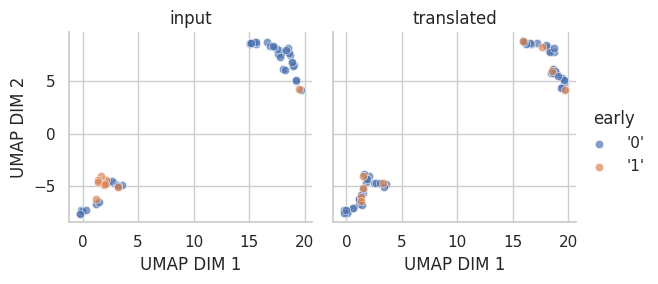

In [15]:
import seaborn as sns

import matplotlib.pyplot as plt

sns.set(style="whitegrid")
g = sns.FacetGrid(df_red_comb, col="origin", hue=param, sharex=True, sharey=True)
g.map_dataframe(sns.scatterplot, x=0, y=1, alpha=0.7 )
g.add_legend()
g.set_axis_labels(task+" DIM 1", task +" DIM 2")
g.set_titles(col_template="{col_name}")
plt.show()

/home/ewald/Github/autoencodix_package/.venv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


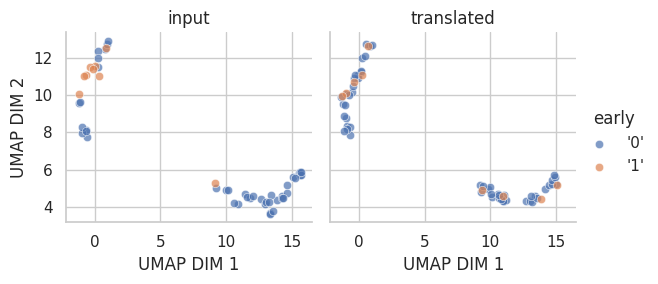

In [16]:
fig = xmodalix._visualizer.show_2D_translation(
	result=xmodalix.result,
	translated_modality=translated_modality,
	split="test",
	param="early",
	# param="extra_class_labels",
	reducer="UMAP",
)

## Recon error and VAE pure comparison

In [17]:
## Imagix (pure comparison)
from autoencodix.utils.default_config import DataCase

img_config2 = img_config # Copy from x-modalix

img_config2.data_case = DataCase.IMG_TO_IMG

img_config2.data_config=DataConfig(
        data_info={
            "IMG": DataInfo(
                file_path=IMGROOT,
				scaling="MINMAX",
                data_type="IMG",
            ),
            "ANNO": DataInfo(
                file_path=IMGMAPPING,
                data_type="ANNOTATION",
            ),
        },
    )
img_config2.beta = 0.01

In [18]:
imagix = acx.Imagix(config=img_config2)
imagix.run()

preprocessing
Checking data type: IMG
Found image type in config
current data info: file_path='../data/images/ALY-2_SYS721/' data_type='IMG' scaling='MINMAX' filtering='VAR' sep=None extra_anno_file=None is_single_cell=False min_cells=0.05 min_genes=0.02 selected_layers=['X'] is_X=False normalize_counts=True log_transform=True k_filter=20 img_root=None img_width_resize=64 img_height_resize=64 translate_direction=None pretrain_epochs=0
Checking data type: ANNO
Given image size is possible, rescaling images to: 64x64
reading annotation file: ../data/ALY-2_SYS721_mappings.txt
Successfully loaded 260 images for IMG
 n_samples: {'multi_sc': {'multi_sc': 0}, 'multi_bulk': {'multi_bulk': 0}, 'annotation': {'IMG': 260}, 'img': {'IMG': 260}, 'from_modality': {}, 'to_modality': {}, 'paired_count': {'paired_count': 260}}
Converting 182 images to torch.float32 tensors...
Converting 52 images to torch.float32 tensors...
Converting 26 images to torch.float32 tensors...


/home/ewald/Github/autoencodix_package/src/autoencodix/utils/_imgreader.py:251: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support sep=None with delim_whitespace=False; you can avoid this warning by specifying engine='python'.
  annotation = pd.read_csv(anno_file, sep=sep)


Epoch 1 - Train Loss: 257824896.0000
Sub-losses: recon_loss: 257824896.0000, var_loss: 17542.9864, anneal_factor: 0.0000, effective_beta_factor: 0.0000
Epoch 1 - Valid Loss: 30087848.0000
Sub-losses: recon_loss: 30086980.0000, var_loss: 1910629376.0000, anneal_factor: 0.0000, effective_beta_factor: 0.0000
Epoch 2 - Train Loss: 254528444.0000
Sub-losses: recon_loss: 254528444.0000, var_loss: 22498.9778, anneal_factor: 0.0000, effective_beta_factor: 0.0000
Epoch 2 - Valid Loss: 30017880.0000
Sub-losses: recon_loss: 30017880.0000, var_loss: 32828.9648, anneal_factor: 0.0000, effective_beta_factor: 0.0000
Epoch 3 - Train Loss: 252649174.0000
Sub-losses: recon_loss: 252649174.0000, var_loss: 30766.1694, anneal_factor: 0.0001, effective_beta_factor: 0.0000
Epoch 3 - Valid Loss: 29973660.0000
Sub-losses: recon_loss: 29973660.0000, var_loss: 19587.0195, anneal_factor: 0.0001, effective_beta_factor: 0.0000
Epoch 4 - Train Loss: 251642934.0000
Sub-losses: recon_loss: 251642934.0000, var_loss: 43

Result Object Public Attributes:
------------------------------
latentspaces: TrainingDynamics object
sample_ids: TrainingDynamics object
reconstructions: TrainingDynamics object
mus: TrainingDynamics object
sigmas: TrainingDynamics object
losses: TrainingDynamics object
sub_losses: LossRegistry(_losses={'recon_loss': TrainingDynamics(), 'var_loss': TrainingDynamics(), 'anneal_factor': TrainingDynamics(), 'effective_beta_factor': TrainingDynamics()})
preprocessed_data: Tensor of shape (0,)
model: ImageVAEArchitecture
model_checkpoints: TrainingDynamics object
datasets: DatasetContainer(train=<autoencodix.data._image_dataset.ImageDataset object at 0x75fb57ce8100>, valid=<autoencodix.data._image_dataset.ImageDataset object at 0x75fb57ce8070>, test=<autoencodix.data._image_dataset.ImageDataset object at 0x75fb57ce8040>)
new_datasets: DatasetContainer(train=None, valid=None, test=None)
adata_latent: AnnData object with n_obs × n_vars = 52 × 8
    uns: 'var_names'
final_reconstruction: <aut

Creating plots ...


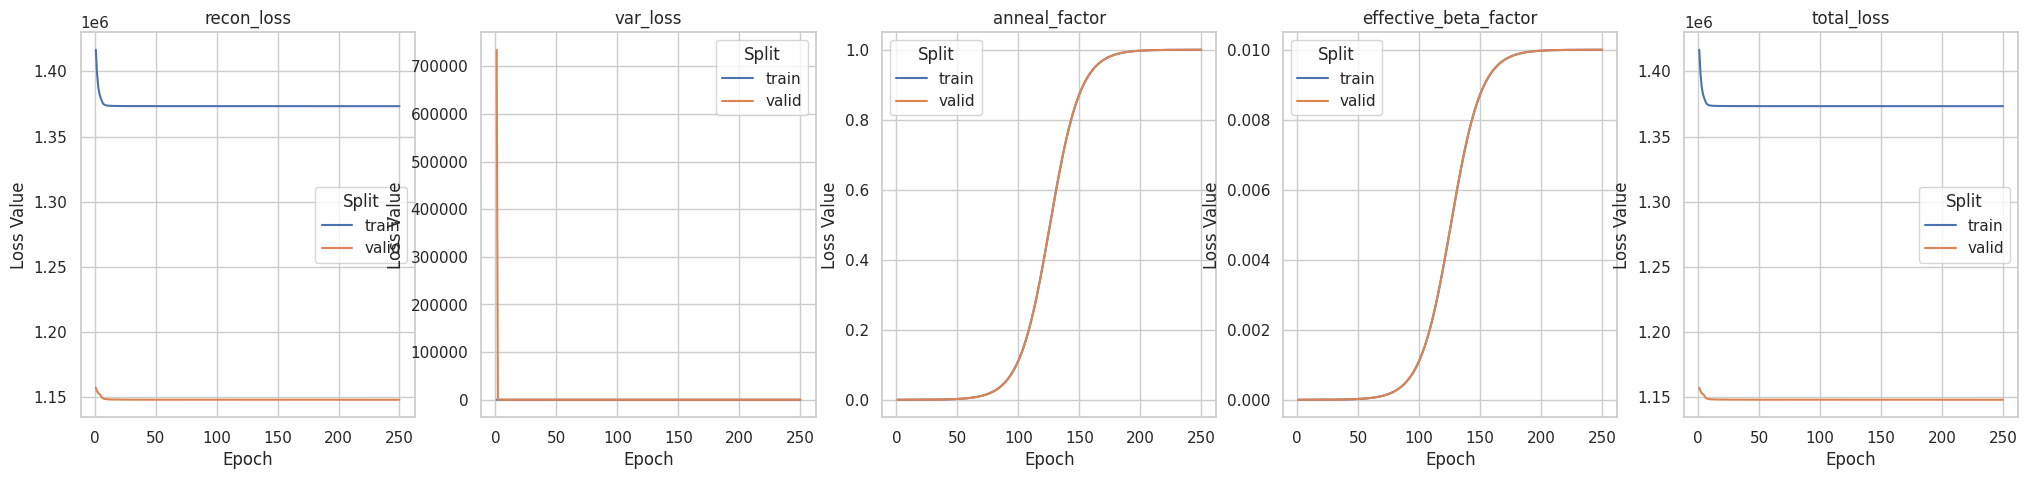

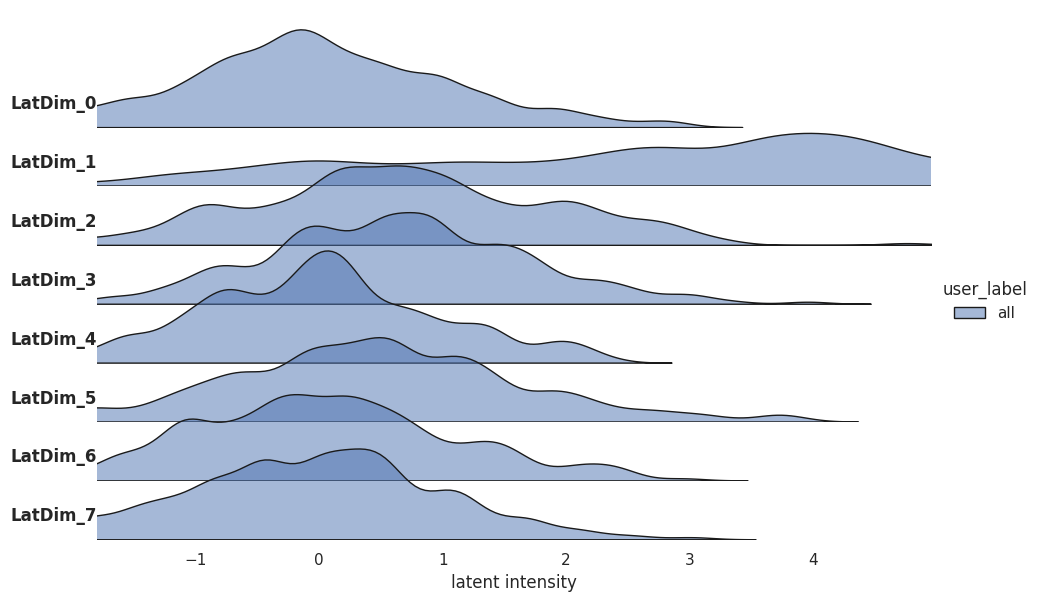

/home/ewald/Github/autoencodix_package/.venv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


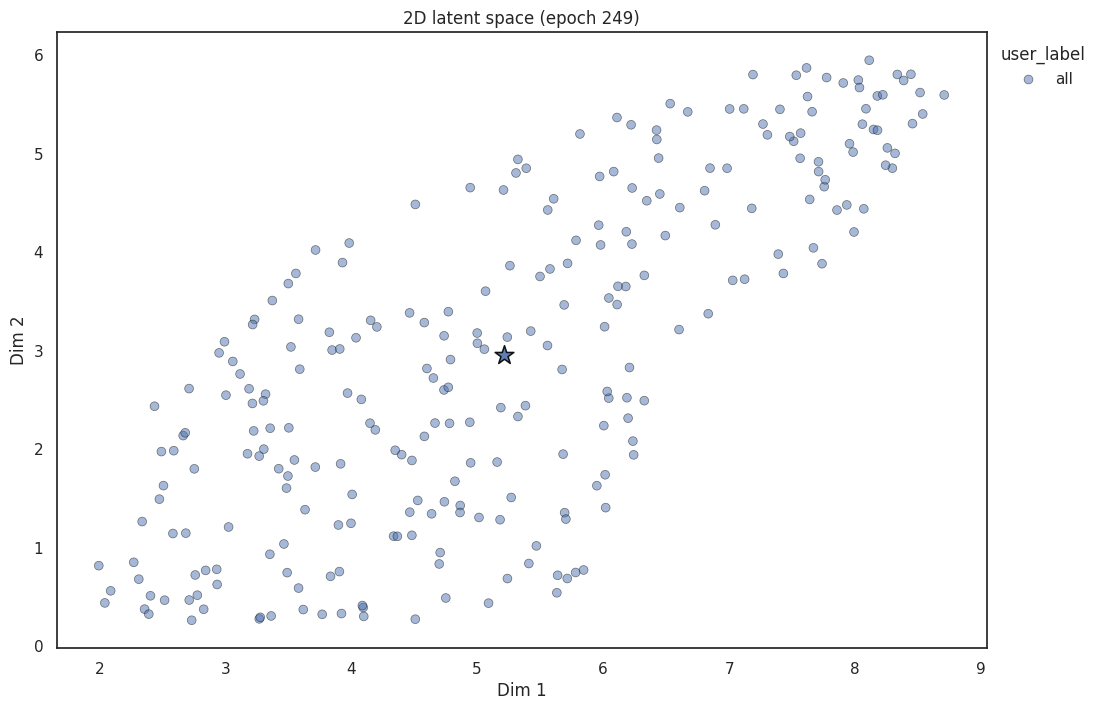

In [19]:
imagix.show_result()

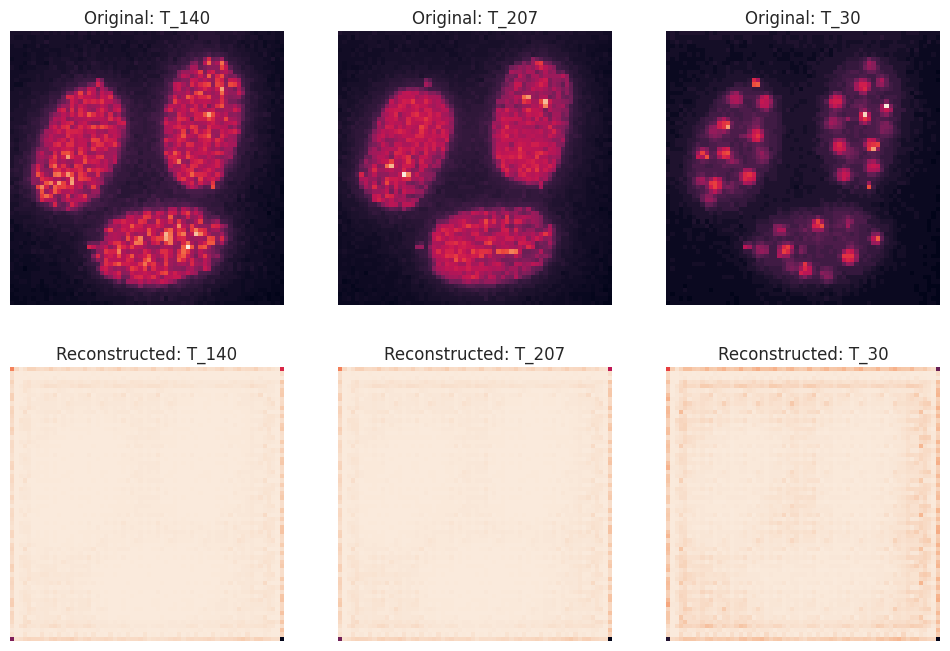

In [20]:
imagix._visualizer.show_image_recon_grid(result=imagix.result)

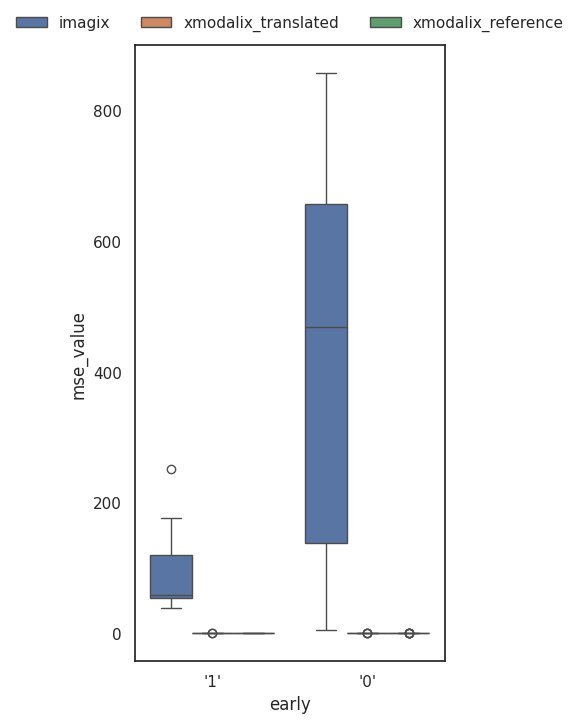

In [21]:
param = "early"
fig, df_comparison = xmodalix._evaluator.pure_vae_comparison(
	xmodalix_result = xmodalix.result,
	pure_vae_result = imagix.result,
	to_key = "img.IMG",
	param = param
)

xmodalix._visualizer.plots["PureVAEComparison"][param] = fig
fig.figure